# Multiple testing inflates the chances of false positives

In neuroimaging, it is very common to test many variables simultaneously (e.g. the brain activity in different voxels), which results in a multiple testing problem.

Let's say that we have one variable, "var1", whose mean we know is not significantly different from zero because we are simulating it as such. Assuming $\alpha=0.05$, we would expect to observe, on average, 5% false positives if we tested its mean multiple times:

In [1]:
set.seed(1234)

n.trials<-100
alpha<-0.05

is.sig<-c()
for(itrial in c(1:n.trials)){
    var1<-rnorm(20)
    pv<-t.test(var1)$p.value
    is.sig<-c(is.sig, pv<alpha)
}

fp.prop <- sum(is.sig)/n.trials
fp.prop

[1] 0.04

Let's say we don't have one variable but two, i.e. "var1" and "var2", both with means that are not significantly different from zero because we are simulating them in that way. If we test them simultaneously and assuming $\alpha=0.05$, let's see how many false positives we expect on average:

In [2]:
set.seed(1234)

n.trials<-100
alpha<-0.05

is.sig<-c()
for(itrial in c(1:n.trials)){
    var1<-rnorm(20)
    var2<-rnorm(20)
    
    pv.1<-t.test(var1)$p.value
    pv.2<-t.test(var2)$p.value
    is.sig<-c(is.sig, (pv.1<alpha | pv.2<alpha))
}

fp.prop <- sum(is.sig)/n.trials
fp.prop

[1] 0.07

**Our likelihood of getting a false positive is now above the threshold $\alpha=0.05$!**

Let's see what happens if we have even more variables:

In [3]:
# Three variables
set.seed(1234)

n.trials<-100
alpha<-0.05

is.sig<-c()
for(itrial in c(1:n.trials)){
    var1<-rnorm(20)
    var2<-rnorm(20)
    var3<-rnorm(20)

    pv.1<-t.test(var1)$p.value
    pv.2<-t.test(var2)$p.value
    pv.3<-t.test(var3)$p.value

    is.sig<-c(is.sig, (pv.1<alpha | pv.2<alpha | pv.3<alpha))
}

fp.prop <- sum(is.sig)/n.trials
fp.prop

[1] 0.15

In [4]:
# Four variables

set.seed(1234)

n.trials<-100
alpha<-0.05

is.sig<-c()
for(itrial in c(1:n.trials)){
    var1<-rnorm(20)
    var2<-rnorm(20)
    var3<-rnorm(20)
    var4<-rnorm(20)

    
    pv.1<-t.test(var1)$p.value
    pv.2<-t.test(var2)$p.value
    pv.3<-t.test(var3)$p.value
    pv.4<-t.test(var4)$p.value

    is.sig<-c(is.sig, (pv.1<alpha | pv.2<alpha | pv.3<alpha | pv.4<alpha))
}

fp.prop <- sum(is.sig)/n.trials
fp.prop

[1] 0.17

**Takeway**: If we increase the number of hypothesis tests, we increase the chances of getting false positives!!!

# We need to choose an appropriate significance threshold

If we perform $m$ indepndent tests, the probability of claiming at least **one** false positive is the following

$$P(\mbox{at least one test is False} | H_0) = 1- (1-\alpha)^m , $$

where $\alpha$ is the type I error rate used to reject or not the null hypothesis in one particular test, and $m$ is the number of statistical tests performed.

$P(\mbox{at least one test is False} | H_0)$ is also known as the **family-wise error rate** (FWER).

In [5]:
compute.fwer<-function(alpha, m)
    return(1 - (1-alpha)^m)

Let's see what happens when we increase the number of tests $m$:

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   1.0.1 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


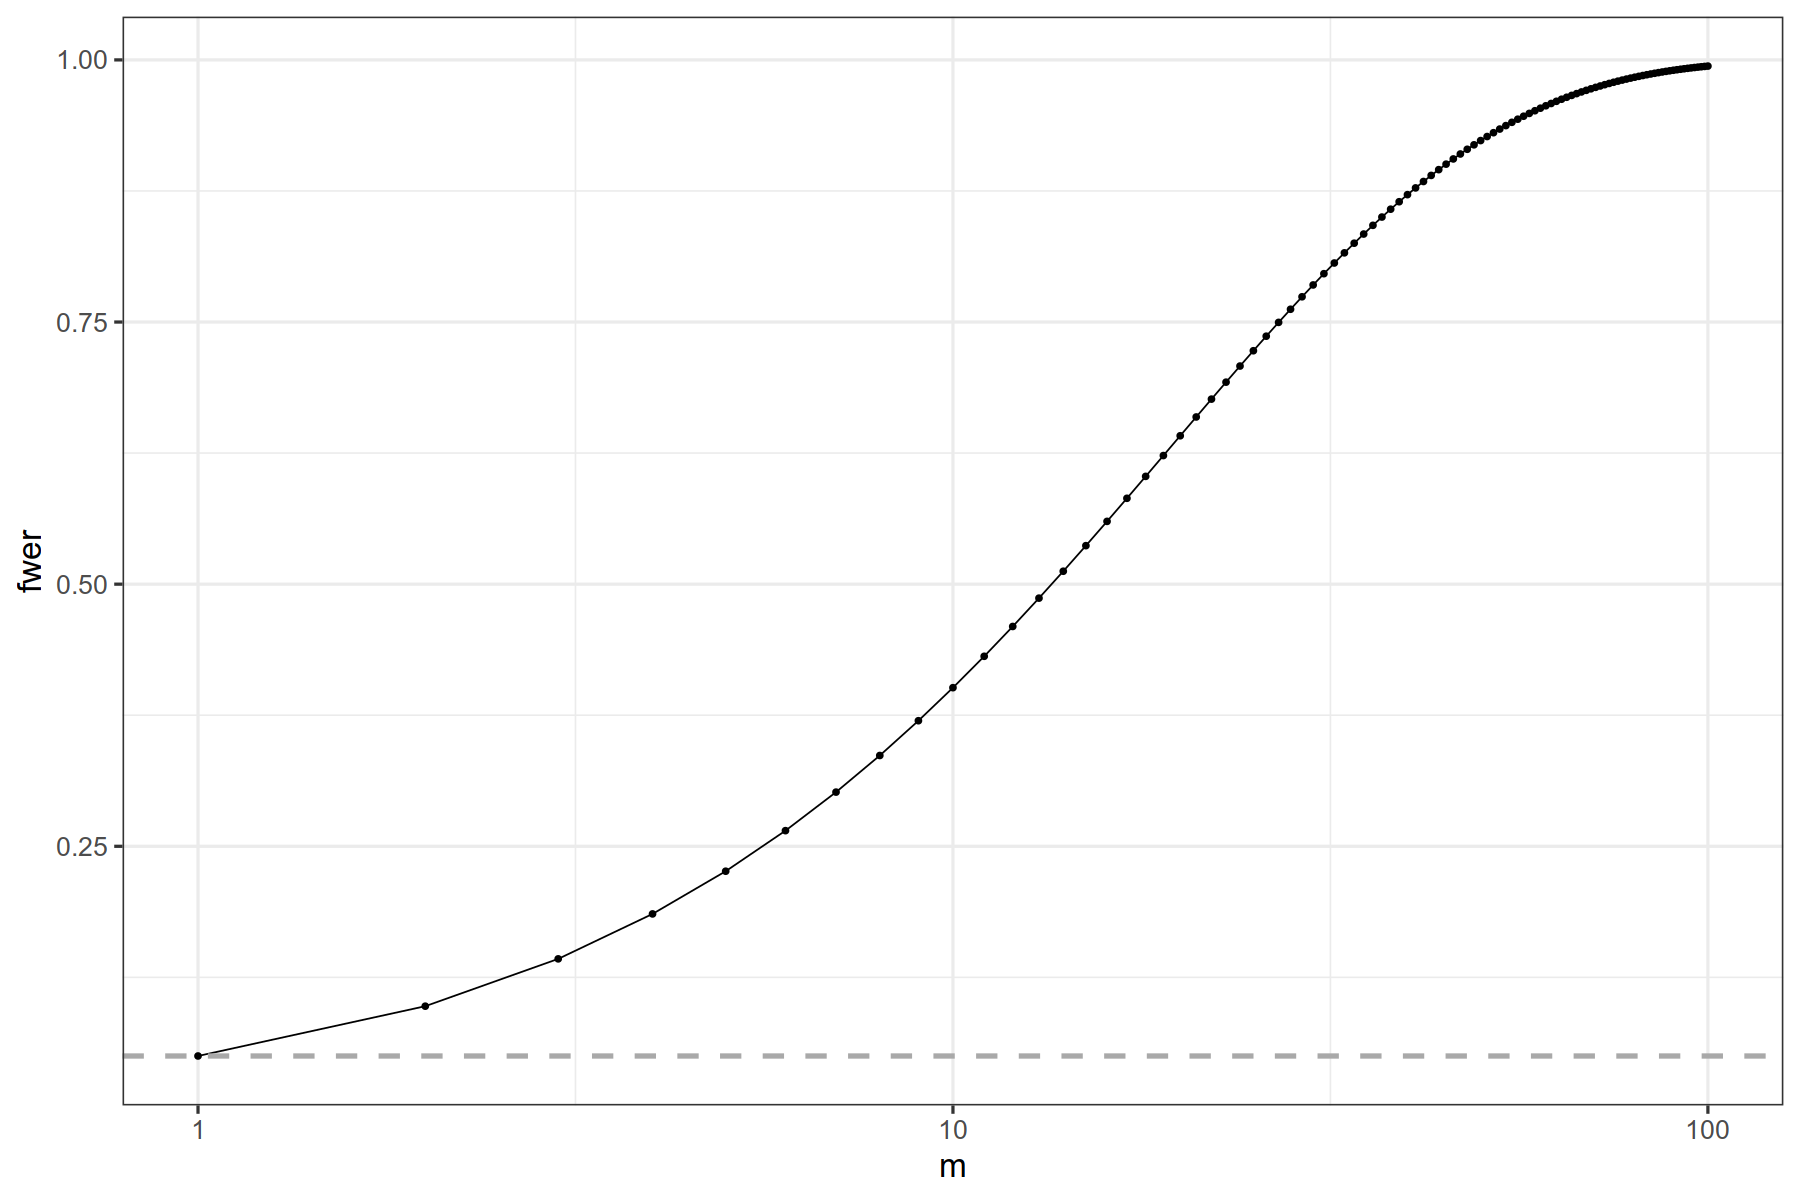

In [6]:
library(tidyverse)
alpha<-0.05
m<-c(1:100)
fwer<-sapply(m, function(x) compute.fwer(alpha, x))
fwer.m05.df<-data.frame(fwer=fwer, alpha=alpha, m=m)

options(repr.plot.width=15, repr.plot.height=10)

ggplot(data = fwer.m05.df, mapping = aes(y=fwer, x=m)) + geom_point() + 
                geom_line() + 
            geom_hline(yintercept=0.05, color='darkgrey', linetype='dashed', linewidth=1.5) + 
            scale_x_log10() + theme_bw(20)

As we increase the number of test, so clearly does fwer.

Let's see what happens when we consider a different value of $\alpha$:

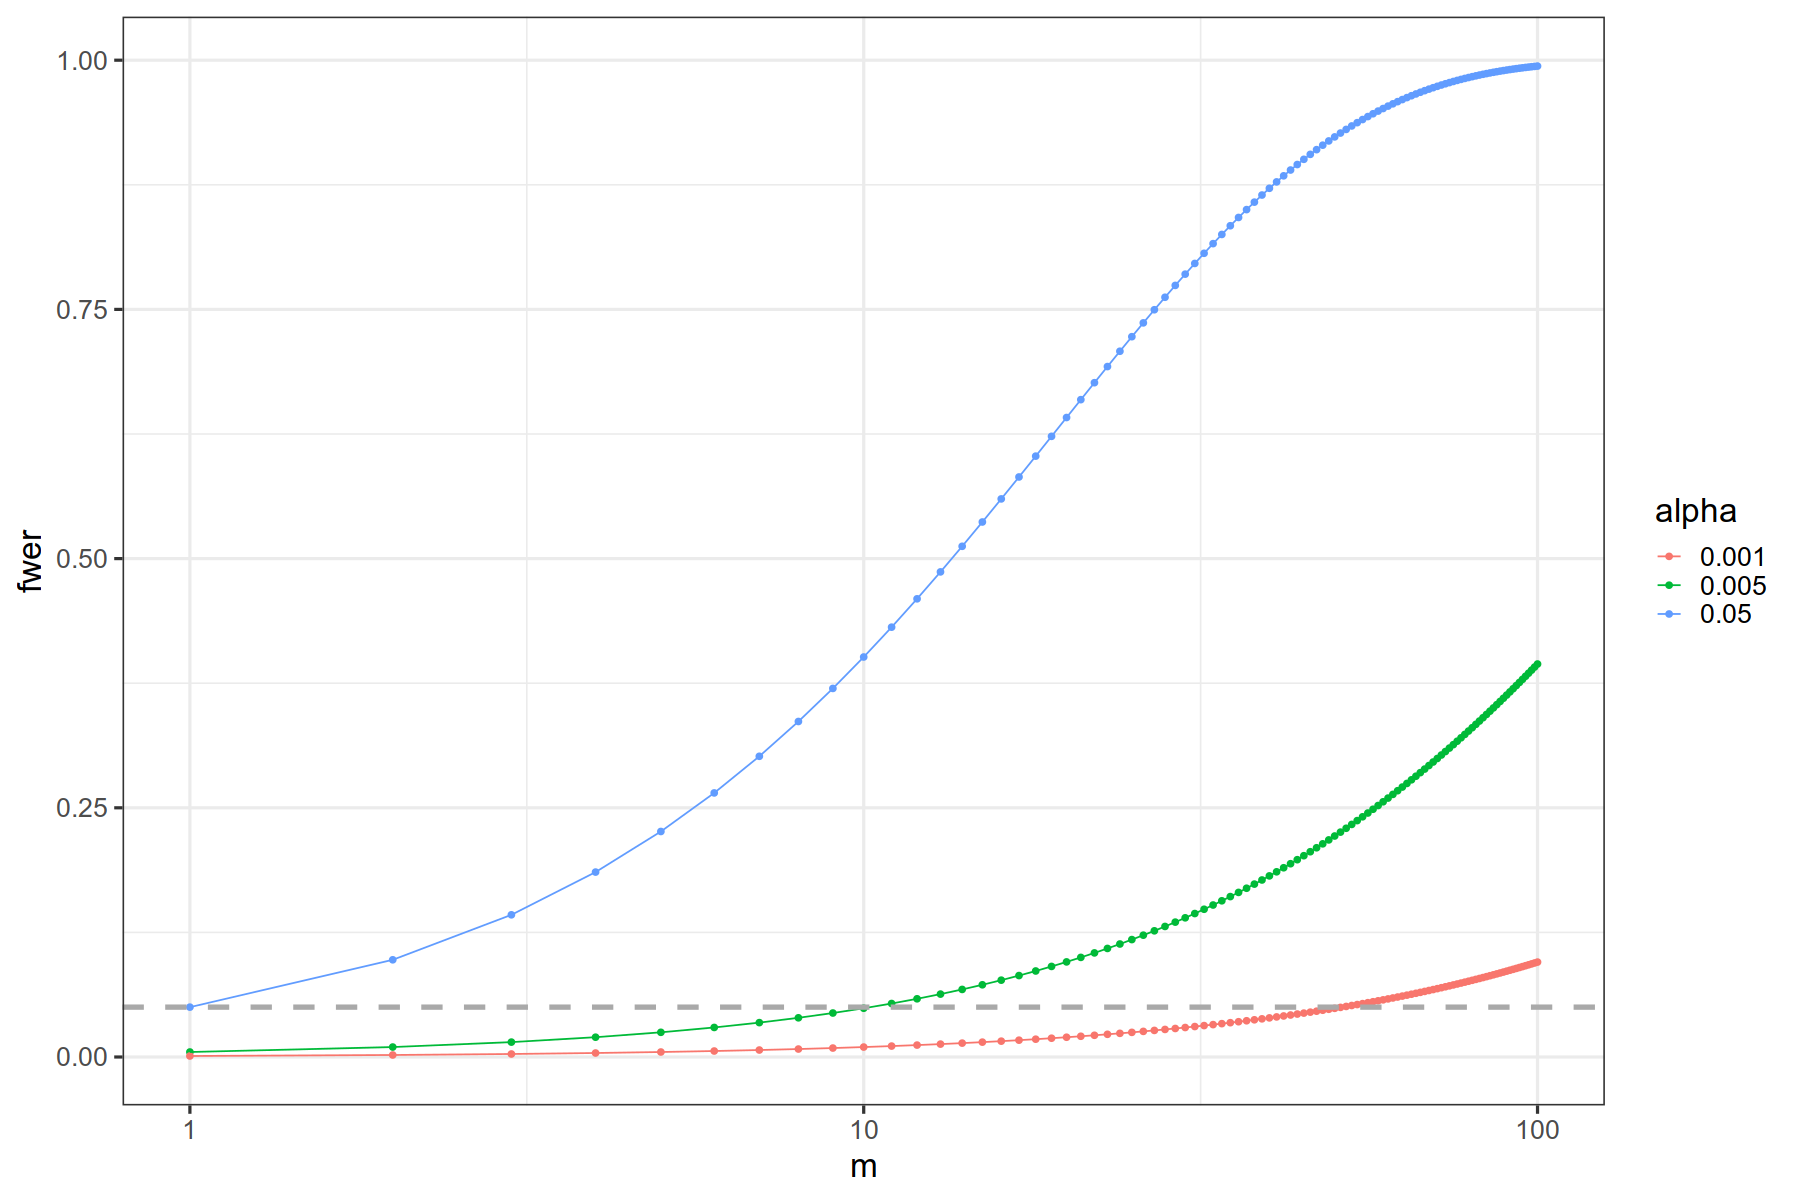

In [7]:
m<-c(1:100)

alpha<-0.05
fwer<-sapply(m, function(x) compute.fwer(alpha, x))
fwer.m05.df<-data.frame(fwer=fwer, alpha=alpha, m=m)

alpha<-0.005
fwer<-sapply(m, function(x) compute.fwer(alpha, x))
fwer.m005.df<-data.frame(fwer=fwer, alpha=alpha, m=m)

alpha<-0.001
fwer<-sapply(m, function(x) compute.fwer(alpha, x))
fwer.m001.df<-data.frame(fwer=fwer, alpha=alpha, m=m)

fwer.m.alphas.df<-rbind(fwer.m05.df, fwer.m005.df, fwer.m001.df)
fwer.m.alphas.df$alpha<-as.character(fwer.m.alphas.df$alpha)

options(repr.plot.width=15, repr.plot.height=10)

ggplot(data = fwer.m.alphas.df, mapping = aes(y=fwer, x=m, color=alpha)) + geom_point() + 
                geom_line() + geom_hline(yintercept=0.05, color='darkgrey', linetype='dashed', linewidth=1.5) +  
            scale_x_log10() + theme_bw(20)

We can see that if we decrease our initial $\alpha$ we can keep FWER more under control. This makes sense, because we are being more strict with respect to when to claim something to be significant or not.

# Controlling the FWER: Bonferroni Correction

Let's see what happens in our first example with 4 variables, but using but $\alpha' = \frac{\alpha}{m}$ instead of $\alpha$.

In [8]:
set.seed(1234)

n.trials<-100
alpha<-0.05
alphap<-alpha/4
is.sig<-c()
for(itrial in c(1:n.trials)){
    var1<-rnorm(20)
    var2<-rnorm(20)
    var3<-rnorm(20)
    var4<-rnorm(20)

    
    pv.1<-t.test(var1)$p.value
    pv.2<-t.test(var2)$p.value
    pv.3<-t.test(var3)$p.value
    pv.4<-t.test(var4)$p.value

    is.sig<-c(is.sig, (pv.1<alphap | pv.2<alphap | pv.3<alphap | pv.4<alphap))
}

fp.prop <- sum(is.sig)/n.trials
fp.prop

[1] 0.06

As we can see, now the FWER is around the error that we aimed for (~0.05).

# Controlling the FWER decrease the statistical power

Let's assume we have generated 1000 statistics, and we are going to test whether their means are greater than zero or not. The first 100 should be significant, because they are sampled from a gaussian distributions with mean=3, whereas the rest (900) should not:

In [9]:
set.seed(1234)
z.sigs<- rnorm(100, mean=3)
z.no.sigs <- rnorm(900)

m.sig<- length(z.sigs)
m.no.sig<- length(z.no.sigs)
m<- m.sig + m.no.sig

pvs<-c(pnorm(c(z.sigs, z.no.sigs), lower.tail = FALSE))

Let's have a look at both type I and II errors:

In [10]:
alpha <-0.05

cat("Number of true tests claimed significant = ", sum(pvs[1:m.sig]<alpha), "\n")

cat("Number of false positives = ", sum(pvs[(m.sig+1):m]<alpha), "\n")

type.I.error<-sum(pvs[(m.sig+1):m]<alpha)/m.no.sig
cat("Type I error = ", type.I.error, "\n")

type.II.error<-sum(pvs[1:m.sig]>alpha)/m.sig
cat("Type II error = ", type.II.error)

Number of true tests claimed significant =  93 
Number of false positives =  44 
Type I error =  0.04888889 
Type II error =  0.07

Let's correct for Bonferroni by taking $\alpha' = 0.05/1000$, instead of $\alpha$=0.05.

In [11]:
alphap <- alpha/m

cat("number of tests claimed significant using bonferroni = ", sum(pvs<alphap), "\n")

cat("Number of true tests claimed significant = ", sum(pvs[1:m.sig]<alphap), "\n")

cat("Number of false positives = ", sum(pvs[(m.sig+1):m]<alphap), "\n")

type.I.error.bonf<-sum(pvs[(m.sig+1):m]<alphap)/m.no.sig
cat("Type I error = ", type.I.error.bonf, "\n")


type.II.error.bonf<-sum(pvs[1:m.sig]>alphap)/m.sig
cat("Type II error = ", type.II.error.bonf)

number of tests claimed significant using bonferroni =  16 
Number of true tests claimed significant =  16 
Number of false positives =  0 
Type I error =  0 
Type II error =  0.84

By controlling for the false positives using Bonferroni, we have reduced our the number of true effects being claimed significant!!! This means that our statistical power is reduced (or our Type II error rate increased).

# Controlling the FDR: BH Correction

In [12]:
q<-0.05

# Sort p-values in decreasing order
o <- order(pvs, decreasing = TRUE)
# reverse order
ro <- order(o)
# Adjust p-values multiplying with the number of tests and dividing by each test rank
p.adj.sorted<-m/c(m:1) * pvs[o]
# Fine tune p-values 
p.adj<-pmin(1, cummin(p.adj.sorted))[ro]

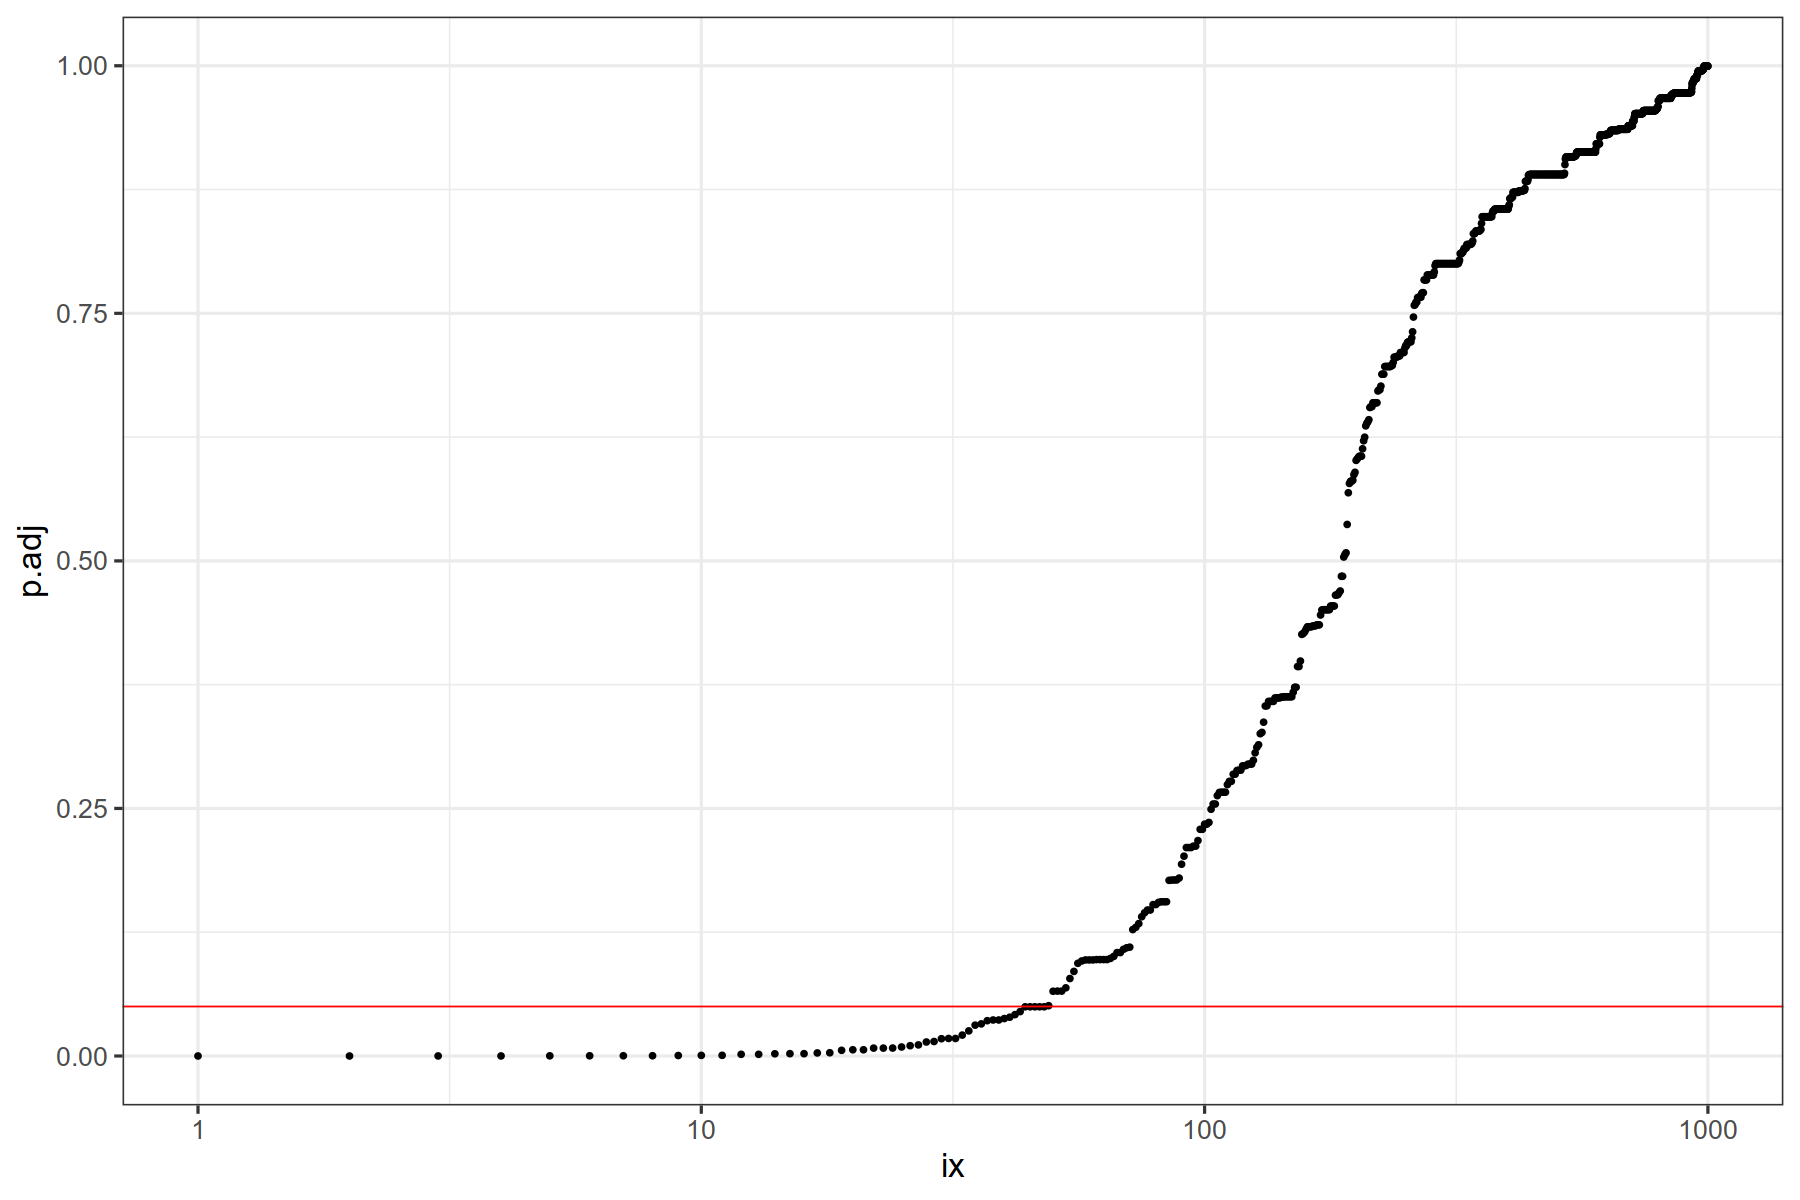

In [13]:
library(tidyverse)

p.adjust.df<-data.frame(p.adj=sort(p.adj), ix=c(1:m))

ggplot(p.adjust.df, mapping = aes(x=ix, y=p.adj)) + geom_point() + 
geom_hline(yintercept=0.05, color='red') + scale_x_log10() + theme_bw(20)

In [14]:
q<-0.05
cat("number of tests claimed significant using FDR = ", sum(p.adj<q), "\n")

cat("Number of true tests claimed significant = ", sum(p.adj[1:m.sig]<q), "\n")

cat("Number of false positives = ", sum(p.adj[(m.sig+1):m]<q), "\n")

type.I.error.bonf<-sum(p.adj[(m.sig+1):m]<q)/m.no.sig
cat("Type I error = ", type.I.error.bonf, "\n")

type.II.error.bonf<-sum(p.adj[1:m.sig]>q)/m.sig
cat("Type II error = ", type.II.error.bonf)

number of tests claimed significant using FDR =  48 
Number of true tests claimed significant =  45 
Number of false positives =  3 
Type I error =  0.003333333 
Type II error =  0.55

As we can see, correcting for FDR can increases the number of true positive effects that are detected, which can increase the statistical power and potentially reduce the Type II error rate.

It's important to keep in mind that this also comes at the cost of potentially increasing the number of false positives, since FDR control is a trade-off between the proportion of true positives and false positives among all rejected null hypotheses. Choosing an appropriate FDR threshold is important to balance the trade-off between statistical power and Type I error rate (false positives).

# Multiple testing correction in R

We can use the `p.adjust` R built-in function to adjust p-values for multiple testing. It takes as input a vector of p-values, and a method argument that specifies the method to use for adjusting the p-values.

The available methods are:

- *bonferroni*: The Bonferroni correction, which is a simple method that controls the FWER at a strict level by multiplying each p-value by the number of tests.

- *holm*: Holm's step-down procedure, which is a more powerful version of the Bonferroni correction that controls the FWER.

- *hochberg*: Hochberg's step-up procedure, which controls the FWER at a slightly weaker level than Holm's method.

- *BH*: The Benjamini-Hochberg procedure, which is a widely used method for controlling the FDR.

- *BY*: The Benjamini-Yekutieli procedure, which is a modified version of the Benjamini-Hochberg procedure that controls the FDR under weaker assumptions.

- *fdr*: the same as *BH*.

Let's see how tow apply this function to correct our generated p-values for bonferroni and FDR:

In [15]:
cat("number of tests claimed significant using bonferroni = ", sum(p.adjust(pvs, method = "bonferroni")< 0.05), "\n")
cat("number of tests claimed significant using FDR = ", sum(p.adjust(pvs, method = "BH")< 0.05), "\n")

number of tests claimed significant using bonferroni =  16 
number of tests claimed significant using FDR =  48 
